<a href="https://colab.research.google.com/github/sanemar/telecomx/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Readme

Como desafio adicional, crie um README.md para seu projeto Telecom X, incluindo:

*   O propósito da análise realizada.
*   Estrutura do projeto e organização dos arquivos.
*   Exemplos de gráficos e insights obtidos.
*   Instruções para executar o notebook.

O projeto "Churn de Clientes" da empresa Telecom X consiste em descobrir o motivo do alto índice de cancelamentos e precisa esclarecer os fatores que a levam à perda de clientes.

Seu desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir da sua análise, os demais colegas da  equipe de Data Science poderá avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.

Importação e Tratamento da Base

Leitura da base em formato JSON
Normalização, limpeza e padronização das variáveis
Criação da variável Contas_Diarias (custo diário por cliente)
Análise Exploratória (EDA)

Estatísticas descritivas
Distribuição por gênero, idade e tipo de serviço
Frequência de churn por contrato e forma de pagamento
Comportamento de custo por tempo de contrato
Geração de Gráficos

Gráficos de barras e linhas para visualização comparativa entre clientes com e sem churn
Conclusões e Recomendações

Custo elevado e contratos mensais estão fortemente associados ao churn
"Electronic check" se mostrou o método de pagamento com maior incidência de cancelamentos
Recomendação de revisão de preços, estímulo a contratos mais longos e melhorias no onboarding
📊 Resultados Visuais
O notebook inclui seções dedicadas a gráficos com análise visual para:

Gênero vs Churn
Senioridade vs Churn
Tipo de contrato vs Churn
Método de pagamento vs Churn
Custo diário médio ao longo do tempo
✅ Conclusão
A análise conclui que o preço percebido elevado, aliado à baixa fidelização (contratos mensais) e ao método de pagamento mais flexível, são os principais fatores associados à evasão. Estratégias de retenção devem focar em custo-benefício, fidelização e acompanhamento nos primeiros meses.


# Importação

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
import seaborn as sns

#📌 Extracão

In [15]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Normalizando os dados do Dataframe

In [16]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)

df_normalizado = df.copy()
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

df_normalizado = df_normalizado.join(customer_df).join(phone_df).join(internet_df).join(account_df)

#Remove as colunas que eram os dicionários de dados
df_normalizado.drop(['customer', 'phone', 'internet', 'account'], axis=1, inplace=True)

display(df_normalizado.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Dicionário de Dados

Dicionário de dados:

*   CustomerID = código único de identificação do cliente
*   Churn = indica que o cliente permanece como cliente
*   Gender = gênero do cliente (masculino ou feminino)
*   SeniorCitizen = indica se o cliente possui mais de 65 anos
*   Partner = indica se o cliente possui parceiro(a)
*   Dependents = indica se o cliente possui dependentes
*   Tenure = indica o tempo de contrato do cliente em meses
*   PhoneService = indica se o cliente possui um serviço de telefonia
*   MultipleLines = indica se o cliente possui mais de um serviço de telefonia associado
*   InternetService = indica se o cliente possui plano de internet
*   OnlineSecurity = indica um plano adicional de segurança
*   OnlineBackup = indica um plano adicional de backup
*   DeviceProtection = indica um plano adicional de proteção do dispositivo
*   TechSupport = indica um plano de suporte técnico
*   StreamingTV = indica se o cliente possui assinatura de TV
*   StreamingMovies = indica se o cliente possui streaming de filmes
*   Contract = indica o tipo de contrato(plano)
*   PaperlessBilling = indica se o cliente optou por fatura impressa
*   PaymentMethod = indica a forma de pagamento
*   ChargesMonthly = total de todos os serviços que o cliente contrata por mês
*   ChargesTotal = indica o total faturado para o cliente


#🔧 Transformação

In [17]:
df_normalizado.dtypes


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [18]:
# alterando o tipo da coluna Carges.Total para float64

df_normalizado['Charges.Total'] = pd.to_numeric(df_normalizado['Charges.Total'], errors='coerce')

In [19]:
df_normalizado.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [20]:
df_normalizado.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [21]:
#Removendo as linhas sem informação da coluna Charges.Total - 11 no total
df_normalizado = df_normalizado.dropna(subset=['Charges.Total'])
print(f"Total de linhas com valores nulos na coluna Charges.Total: {df_normalizado['Charges.Total'].isnull().sum()}. \
       \nO total de linhas do dataframe é: {df_normalizado.shape[0]}")

Total de linhas com valores nulos na coluna Charges.Total: 0.        
O total de linhas do dataframe é: 7256


In [22]:
#Também preciso descobrir quais as linhas que possuem valores vazios em alguma das colunas
colunas = df_normalizado.columns.tolist()[1:]
for coluna in colunas:
   if df_normalizado[coluna].dtype =='object':
    print(f"A coluna {coluna}: {df_normalizado[coluna].unique()}.")


A coluna Churn: ['No' 'Yes' ''].
A coluna gender: ['Female' 'Male'].
A coluna Partner: ['Yes' 'No'].
A coluna Dependents: ['Yes' 'No'].
A coluna PhoneService: ['Yes' 'No'].
A coluna MultipleLines: ['No' 'Yes' 'No phone service'].
A coluna InternetService: ['DSL' 'Fiber optic' 'No'].
A coluna OnlineSecurity: ['No' 'Yes' 'No internet service'].
A coluna OnlineBackup: ['Yes' 'No' 'No internet service'].
A coluna DeviceProtection: ['No' 'Yes' 'No internet service'].
A coluna TechSupport: ['Yes' 'No' 'No internet service'].
A coluna StreamingTV: ['Yes' 'No' 'No internet service'].
A coluna StreamingMovies: ['No' 'Yes' 'No internet service'].
A coluna Contract: ['One year' 'Month-to-month' 'Two year'].
A coluna PaperlessBilling: ['Yes' 'No'].
A coluna PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)'].


In [23]:
#A coluna Churn possui valores vazios, praciso remover as linhas que não possuem valores - 224 linhas
len(df_normalizado[df_normalizado['Churn'] == ''])

224

In [24]:
#Removendo as linhas do dataframe com Churn vazio
df_normalizado = df_normalizado[df_normalizado['Churn'] != '']

comprimento_df = len(df_normalizado)
churn_vazio = len(df_normalizado[df_normalizado['Churn'] == ''])

print(f"Churn vazio {churn_vazio} linhas sem valor na coluna Churn de um total de {comprimento_df} linhas")


Churn vazio 0 linhas sem valor na coluna Churn de um total de 7032 linhas


#📊 Carga e análise

A partir desta etapa, irei focar na análise dos dados para demontrar, por meio de gráficos gerados pelas bibliotecas Matplotlib e Seaborn, os possiveis motivos da evasão dos clientes da empresa Telecom X.

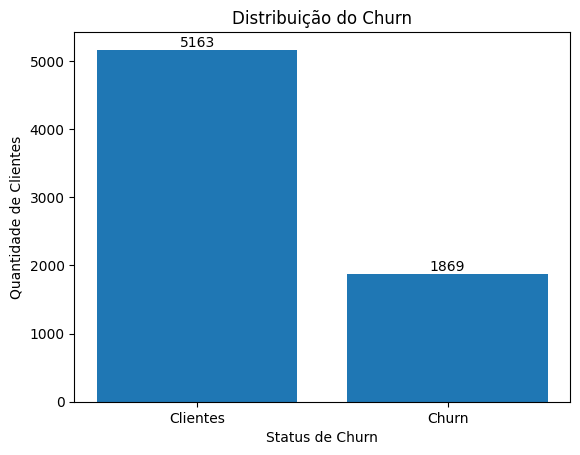

In [37]:
# Este primeiro gráfico exibe a relação entre os clientes e os não clientes com base nos dados que foram tratados na etapa de transformação
contagem_churn = df_normalizado['Churn'].value_counts()
plt.bar(['Clientes', 'Churn'], contagem_churn)
plt.title('Distribuição do Churn')
plt.ylabel('Quantidade de Clientes')
plt.xlabel('Status de Churn')
for i, valor in enumerate(contagem_churn):
    plt.text(i, valor + 50, str(valor), ha='center')
plt.show()

In [33]:
df_genero = df_normalizado.groupby(['gender', 'Churn']).size().unstack().fillna(0)
df_genero

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


In [34]:
df_senioridade = df_normalizado.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)
df_senioridade

Churn,No,Yes
SeniorCitizen,,
0,4497,1393
1,666,476


In [39]:
planos = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'PhoneService'
]

tabelas = []

for plano in planos:
    tab = df_normalizado.groupby([plano, 'Churn']).size().unstack(fill_value=0)
    tab['Total'] = tab['No'] + tab['Yes']
    tab.columns = ['Sem_Churn', 'Com_Churn', 'Total']
    tab['Plano'] = plano
    # Assuming 'Yes' corresponds to 'Contratado'
    tab['Contratado'] = tab.index
    tabelas.append(tab.reset_index(drop=True))

tabela_planos = pd.concat(tabelas, ignore_index=True)
# Filter for rows where the service was contracted ('Yes' or equivalent)
tabela_contratados = tabela_planos[tabela_planos['Contratado'].isin(['Yes', 'No phone service', 'No internet service'])].reset_index(drop=True)

# Only keep rows where 'Contratado' is 'Yes', except for PhoneService where 'Yes' means contracted.
# For PhoneService, 'No' means not contracted, 'Yes' means contracted.
# For MultipleLines, 'No phone service' means not contracted, 'Yes' or 'No' means contracted.
# For InternetService related columns, 'No internet service' means not contracted, 'Yes' or 'No' means contracted.
# Need to adjust filtering based on the specific column and its 'contracted' value.

filtered_tabelas = []
for plano in planos:
    tab = df_normalizado.groupby([plano, 'Churn']).size().unstack(fill_value=0)
    tab['Total'] = tab['No'] + tab['Yes']
    tab.columns = ['Sem_Churn', 'Com_Churn', 'Total']
    tab['Plano'] = plano

    # Determine the value that indicates the service was contracted for each column
    if plano == 'PhoneService':
        contracted_value = 'Yes'
    elif plano == 'MultipleLines':
        contracted_value = 'Yes' # 'No' also means contracted, but without multiple lines
    elif plano in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
        contracted_value = 'Yes' # 'No' also means contracted, but without the specific feature
    else:
        contracted_value = None # Should not happen with the current list of planos

    if contracted_value:
        if plano == 'MultipleLines':
             # Include both 'Yes' and 'No' as contracted for MultipleLines, but exclude 'No phone service'
             tab_filtered = tab[tab.index.isin(['Yes', 'No'])].copy()
        elif plano in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
             # Include both 'Yes' and 'No' as contracted for internet services, but exclude 'No internet service'
             tab_filtered = tab[tab.index.isin(['Yes', 'No'])].copy()
        else:
             # For other services like PhoneService, 'Yes' indicates contracted
             tab_filtered = tab[tab.index == contracted_value].copy()

        tab_filtered['Contratado'] = tab_filtered.index
        filtered_tabelas.append(tab_filtered.reset_index(drop=True))


tabela_contratados_filtered = pd.concat(filtered_tabelas, ignore_index=True)
tabela_contratados_filtered = tabela_contratados_filtered[['Plano', 'Total', 'Sem_Churn', 'Com_Churn']]
tabela_contratados_filtered.sort_values('Total', ascending=False)

,Plano,Total,Sem_Churn,Com_Churn
14,PhoneService,6352,4653,1699
2,OnlineSecurity,3497,2036,1461
8,TechSupport,3472,2026,1446
0,MultipleLines,3385,2536,849
6,DeviceProtection,3094,1883,1211
4,OnlineBackup,3087,1854,1233
1,MultipleLines,2967,2117,850
10,StreamingTV,2809,1867,942
12,StreamingMovies,2781,1843,938
13,StreamingMovies,2731,1913,818


In [42]:
df_normalizado.groupby(['PaymentMethod', 'Churn']).size().unstack().fillna(0)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [43]:
df_tempo_contrato = df_normalizado.groupby(['tenure', 'Churn']).size().unstack().fillna(0)
df_tempo_contrato

Churn,No,Yes
tenure,,
1,233,380
2,115,123
3,106,94
4,93,83
5,69,64
...,...,...
68,91,9
69,87,8
70,108,11


In [45]:
#Exibe a relação entre o tempo de contrato e o percentual de Churn
tabela = df_normalizado.groupby(['tenure', 'Churn']).size().unstack().fillna(0)
tabela['% churn'] = (tabela['Yes'] / (tabela['No'] + tabela['Yes']) * 100).round(2)
tabela_percentual = tabela[['No', 'Yes', '% churn']]

tabela_percentual.head(10)

Churn,No,Yes,% churn
tenure,,,
1,233,380,61.99
2,115,123,51.68
3,106,94,47.00
4,93,83,47.16
5,69,64,48.12
6,70,40,36.36
7,80,51,38.93
8,81,42,34.15
9,73,46,38.66


In [53]:
#Exibe o custo médio entre os clientes ativos e os clientes evadidos
custo_medio = df_normalizado.groupby(['Churn'])[['Charges.Monthly']].mean().round(2)
custo_medio

,Charges.Monthly
Churn,
No,61.31
Yes,74.44


In [58]:
#Exibe o custo médio entre os clientes ativos e os clientes evadidos
media_gastos = df_normalizado.groupby(['tenure', 'Churn'])[['Charges.Monthly']].mean().round(2)

# mudando a forma de exibição
custo_mensal = media_gastos.unstack().swaplevel(axis=1).sort_index(axis=1)
custo_mensal

Churn,No,Yes
,Charges.Monthly,Charges.Monthly
tenure,,
1,37.91,58.20
2,47.88,65.92
3,50.92,66.01
4,45.65,70.64
5,51.48,71.27
...,...,...
68,70.88,98.01
69,68.19,99.45


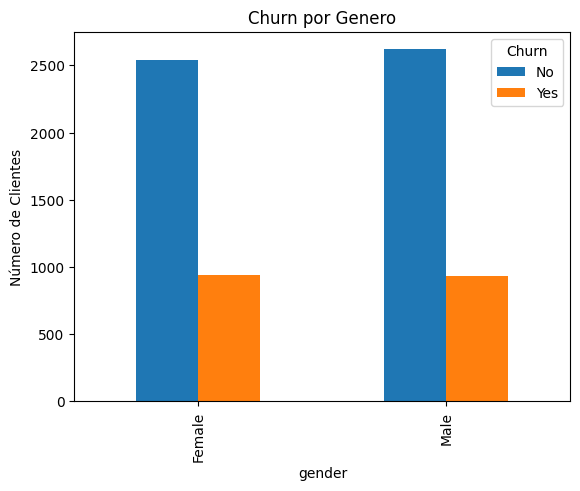

In [61]:
# churn por genero
genero_df = df_normalizado.groupby(['gender', 'Churn']).size().unstack().fillna(0)

genero_df.plot(
    kind='bar',
    title="Churn por Genero"
).set_ylabel("Número de Clientes")

plt.show()

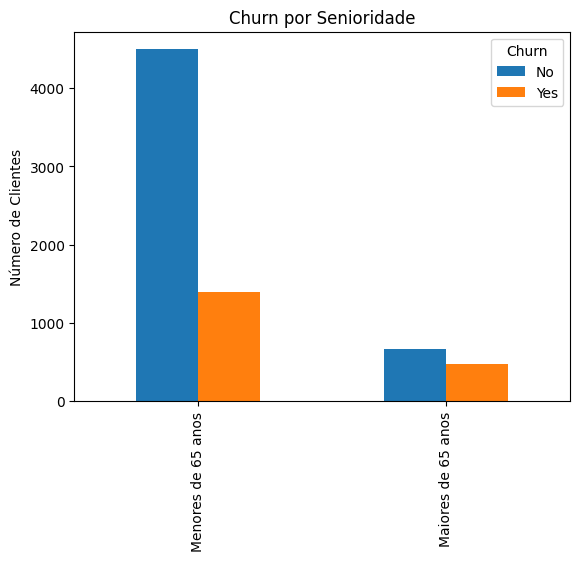

In [62]:
# churn por senioridade

senioridade_df = df_normalizado.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)
senioridade_df.index = ['Menores de 65 anos', 'Maiores de 65 anos']

senioridade_df.plot(
    kind='bar',
    title="Churn por Senioridade"
).set_ylabel("Número de Clientes")

plt.show()

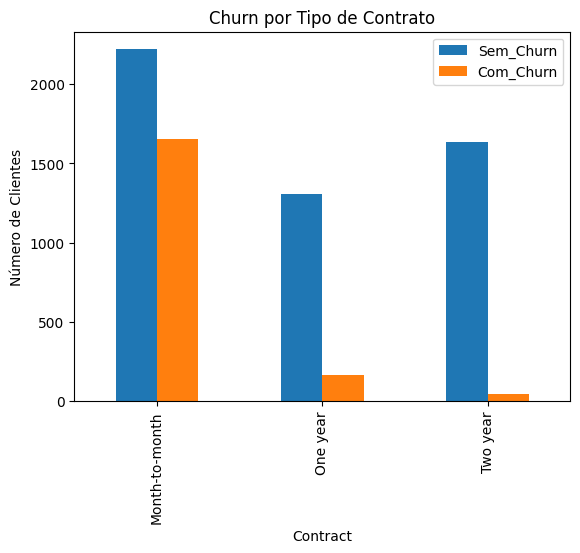

In [66]:
# churn por tipo de contrato
contratos_df = df_normalizado.groupby(['Contract', 'Churn']).size().unstack().fillna(0)
contratos_df.columns = ['Sem_Churn', 'Com_Churn']

contratos_df[['Sem_Churn', 'Com_Churn']].plot(
    kind='bar',
    title="Churn por Tipo de Contrato"
).set_ylabel("Número de Clientes")

plt.show()

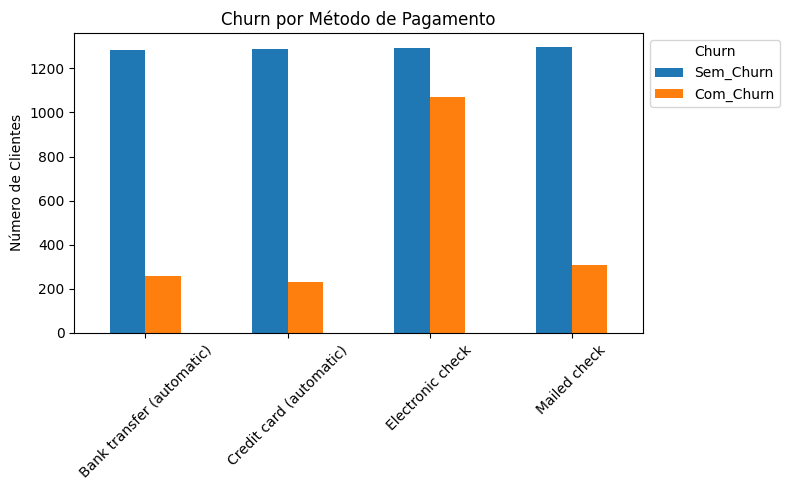

In [65]:
# churn por método de pagamento

import matplotlib.pyplot as plt

pagamento_df = df_normalizado.groupby(['PaymentMethod', 'Churn']).size().unstack().fillna(0)
pagamento_df.columns = ['Sem_Churn', 'Com_Churn']

ax = pagamento_df.plot(
    kind='bar',
    figsize=(8, 5)
)

plt.title("Churn por Método de Pagamento")
plt.ylabel("Número de Clientes")
plt.xlabel("")
plt.xticks(rotation=45)
plt.legend(title="Churn", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [71]:
# custo diário médio por tempo de contrato
df_normalizado_tratado = df_normalizado[df_normalizado['tenure'] >= 1].copy()

df_normalizado_tratado['Charges.Monthly'] = df_normalizado_tratado['Charges.Monthly'] / (df_normalizado_tratado['tenure'] * 30)

tempo_df = df_normalizado_tratado.groupby(['tenure', 'Churn'])['Charges.Monthly'].mean().unstack().fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(tempo_df[0], label='0', color='#1f77b4')  # Sem churn
plt.plot(tempo_df[1], label='1', color='#2ca02c')  # Com churn

plt.title("Custo Diário Médio por Tempo de Contrato")
plt.xlabel("Meses de Contrato")
plt.ylabel("Custo Diário Médio")
plt.legend(title="Churn", loc='upper right')
plt.tight_layout()
plt.show()

KeyError: 0

<Figure size 1000x600 with 0 Axes>

#📄Relatorio Final